# Spain Wildfires

- Incendios forestales ocurridos en España entre los años 1968 y 2016.
- Estudio realizado sobre un dataset formado por 585400 observaciones y 51 atributos que se describen a continuación.

------------------------------------------------------------------------------------------------------------------------

**1. Data Cleaning and Preprocessing**

A. Data collection from Kaggle API:

***Note: To run all the code from the beginning first REMOVE the file 'incendios.csv' from src folder.**

In [4]:
import os
import subprocess
from shutil import copy2
#from kaggle.api.kaggle_api_extended import KaggleApi

# Step 1: Move (copy) the kaggle.json file to the correct location
src_path = '/workspaces/Machine-Learning-Final-Project.FGM/.devcontainer/kaggle.json'
dst_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Ensure the .kaggle directory exists and copy the kaggle.json file
os.makedirs(os.path.dirname(dst_path), exist_ok=True)
copy2(src_path, dst_path)

# Set permissions for the kaggle.json file
os.chmod(dst_path, 0o600)

# Step 2: Download the dataset again using Kaggle API
#api = KaggleApi()
##api.authenticate()

# Define dataset info
dataset_name = 'patrilc/wildfirespain'
zip_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip'
output_dir = './'

# Download dataset
#api.dataset_download_files(dataset_name, path=output_dir, unzip=False)

# Step 3: Check if the zip file exists and extract it
if os.path.exists(zip_file_path):
    subprocess.run(['unzip', zip_file_path, '-d', output_dir], check=True)
    print(f"{zip_file_path} successfully extracted to {output_dir}")
else:
    print(f"{zip_file_path} does not exist in the specified path.")

# Step 4: List the contents of the current directory
directory_contents = os.listdir(output_dir)
print("Directory contents after extraction:")
for item in directory_contents:
    print(item)

Archive:  /workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip
  inflating: ./incendios.csv         
/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip successfully extracted to ./
Directory contents after extraction:
incendios.csv
utils.py
app.py
workflow.csv
explore.ipynb
estructura_incendios_con_dtypes.xlsx
wildfirespain.zip


In [5]:
import pandas as pd

file_path = "/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv"

incendios = pd.read_csv(file_path, delimiter=';')

pd.set_option('display.max_columns', None)

incendios


/tmp/ipykernel_26832/1022687328.py:5: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path, delimiter=';')


,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,comunidad,idprovincia,provincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,deteccion,extinguido,horadeteccion,mesdeteccion,duracion,primeranotificaciondesde112,iddetectadopor,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,intencionalidad,idcausante,idautorizacionactividad,idclasedia,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,direccionviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum,claseincendio,lugar,combustible,tipodefuego,tipodeataque
0,568679.0,2016,3,NaN,NaN,15,Islas Baleares,7,Islas Baleares,63,39.709,2.622,409.0,1,1.0,10/01/2016,10/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,290,NaN,0.0,1.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,17.0,49.0,20.0,Suroeste,0.20,0.0,20,18,0,31.0,466451.0,4397989.0,2.0,conato,excursionistas,bosques,superficie,directo
1,568680.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,157,42.466,0.695,1213.0,1,1.0,12/01/2016,12/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,1.0,322,NaN,0.0,3.0,1,no_intencionado,1,3.0,laborable,2.0,8.0,0.0,0.0,Norte,0.05,0.0,4,0,0,30.0,800159.0,4713460.0,2.0,conato,vertederos,pas_mat,superficie,directo
2,568681.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,125,42.141,-0.408,483.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,241,NaN,0.0,3.0,1,no_intencionado,1,4.0,festivo,3.0,8.0,40.0,4.0,Noreste,0.23,0.0,9,4,0,30.0,714747.0,4675882.0,2.0,conato,NaN,pastizal,superficie,directo
3,568682.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,52,41.689,0.178,196.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,0.0,0.0,0.0,Norte,0.65,0.0,8,4,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
4,568683.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,197,41.866,-0.461,399.0,1,1.0,22/01/2016,22/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,1,no_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.15,0.0,7,3,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585394,1240141.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,249,39.729,-2.928,775.0,1,1.0,06/10/2016,06/10/2016,tarde,octubre,0,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,7.95,0.0,1,0,0,NaN,NaN,NaN,NaN,incendio,viasferreas,pastizal,superficie,directo
585395,1240142.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,128,39.569,-2.762,735.0,1,1.0,03/10/2016,04/10/2016,noche,octubre,1,VERDADERO,vigilante_fijo,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,1.58,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,pas_res,superficie,directo
585396,1240144.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,102,39.612,-2.281,815.0,1,1.0,03/10/2016,04/10/2016,tarde,octubre,1,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,4.10,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,mat_res,superficie,directo
585397,1240145.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,153,39.485,-2.745,716.0,1,1.0,03/10/2016,03/10/2016,tarde,octubre,0,FALSO,base_cdf,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.86,0.0,4,2,0,NaN,NaN,NaN,NaN,conato,otros,pas_mat,superficie,directo


In [6]:
# Get basic info about the dataset
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585399 entries, 0 to 585398
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   idpif                        585399 non-null  float64
 1   anio                         585399 non-null  int64  
 2   idestadopif                  585399 non-null  int64  
 3   probabilidadignicion         489389 non-null  float64
 4   idpeligro                    579862 non-null  float64
 5   idcomunidad                  585399 non-null  int64  
 6   comunidad                    585399 non-null  object 
 7   idprovincia                  585399 non-null  int64  
 8   provincia                    585399 non-null  object 
 9   idmunicipio                  585399 non-null  int64  
 10  latitud                      514051 non-null  float64
 11  longitud                     514051 non-null  float64
 12  altitud                      514051 non-null  float64
 13 

In [7]:
# Summary statistics
incendios.describe()

,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,idprovincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,duracion,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,idcausante,idautorizacionactividad,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum
count,5.853990e+05,585399.000000,585399.000000,489389.000000,579862.000000,585399.000000,585399.000000,585399.000000,514051.000000,514051.000000,514051.000000,585399.000000,6414.000000,585399.000000,6414.000000,585399.000000,302248.000000,9262.000000,6414.000000,585399.000000,585399.000000,6414.000000,206416.000000,282064.000000,277034.000000,262184.000000,585399.000000,6417.000000,585399.000000,585399.000000,585399.000000,220590.000000,2.205470e+05,2.205850e+05,3926.000000
mean,8.659738e+05,1997.324696,3.984993,15.044114,1.503778,6.791136,27.064163,65.697951,41.585214,-5.746319,447.324412,1.007296,1.148269,0.196531,2.779701,384.069342,409.132745,0.436623,1.604927,1.770384,1.886448,3.438572,14.609342,22.310227,52.931961,14.951481,12.767913,0.023064,27.764579,6.502818,1.813515,29.474559,5.165553e+05,4.609158e+06,2.028528
std,1.693967e+05,10.883810,0.121833,23.029899,0.873342,5.275141,11.840965,92.213738,1.991222,3.020347,321.710537,0.126325,1.234667,0.756895,1.006274,103.158710,25.077332,2.642960,0.918721,0.420586,0.317266,0.795600,20.132597,10.679793,20.174491,14.384499,155.310767,0.173253,243.440053,41.380794,13.821138,0.631843,1.453164e+05,2.409668e+05,0.290313
min,5.686790e+05,1968.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.756000,-17.998000,1.000000,1.000000,1.000000,0.000000,1.000000,100.000000,400.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.140600e+04,3.060500e+04,2.000000
25%,7.194475e+05,1990.000000,4.000000,0.000000,1.000000,3.000000,15.000000,15.000000,40.720000,-8.016000,158.000000,1.000000,1.000000,0.000000,2.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,17.000000,39.000000,5.000000,0.100000,0.000000,5.000000,0.000000,0.000000,29.000000,4.270655e+05,4.537110e+06,2.000000
50%,8.658160e+05,1998.000000,4.000000,0.000000,1.000000,4.000000,32.000000,43.000000,42.234000,-6.552000,431.000000,1.000000,1.000000,0.000000,3.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,4.000000,9.000000,22.000000,53.000000,10.000000,0.700000,0.000000,9.000000,3.000000,0.000000,29.000000,5.476480e+05,4.673165e+06,2.000000
75%,1.012180e+06,2005.000000,4.000000,30.000000,2.000000,11.000000,36.000000,80.000000,42.866000,-4.182000,677.000000,1.000000,1.000000,0.000000,3.000000,400.000000,402.000000,0.000000,3.000000,2.000000,2.000000,4.000000,18.000000,28.000000,68.000000,20.000000,3.000000,0.000000,18.000000,5.000000,0.000000,30.000000,6.169630e+05,4.733550e+06,2.000000
max,1.240186e+06,2016.000000,4.000000,100.000000,4.000000,18.000000,51.000000,999.000000,43.740000,4.290000,1695.000000,21.000000,84.000000,153.000000,5.000000,600.000000,499.000000,85.000000,3.000000,2.000000,2.000000,4.000000,1430.000000,2132.000000,254.000000,250.000000,28879.100000,2.000000,82320.000000,8520.000000,3264.000000,71.000000,6.557209e+06,4.664850e+07,5.000000


In [8]:
def column_summary(incendios):
    summary_data = []
    
    for col_name in incendios.columns:
        col_dtype = incendios[col_name].dtype
        num_of_nulls = incendios[col_name].isnull().sum()
        num_of_non_nulls = incendios[col_name].notnull().sum()
        num_of_distinct_values = incendios[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = incendios[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = incendios[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_incendios = pd.DataFrame(summary_data)
    return summary_incendios


summary_incendios = column_summary(incendios)
display(summary_incendios)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,idpif,float64,0,585399,585399,"{1240186.0: 1, 568679.0: 1, 568680.0: 1, 56868..."
1,anio,int64,0,585399,49,"{1995: 25557, 2005: 25492, 2000: 23574, 1997: ..."
2,idestadopif,int64,0,585399,4,"{4: 576631, 3: 8752, 2: 15, 1: 1}"
3,probabilidadignicion,float64,96010,489389,99,"{0.0: 309071, 30.0: 38130, 40.0: 37194, 20.0: ..."
4,idpeligro,float64,5537,579862,5,"{1.0: 331401, 2.0: 112872, 3.0: 96233, 0.0: 32..."
5,idcomunidad,int64,0,585399,18,"{3: 253477, 17: 71775, 5: 46937, 4: 40210, 14:..."
6,comunidad,object,0,585399,18,"{'Galicia': 253477, 'Castilla y Leon': 71775, ..."
7,idprovincia,int64,0,585399,51,"{36: 79222, 32: 77598, 15: 59234, 33: 46937, 2..."
8,provincia,object,0,585399,51,"{'Pontevedra': 79222, 'Ourense': 77598, 'A Cor..."
9,idmunicipio,int64,0,585399,478,"{0: 67038, 34: 8966, 11: 8276, 50: 7889, 9: 76..."


In [9]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios.shape

                             Missing Values  Percentage Missing
idpif                                     0            0.000000
anio                                      0            0.000000
idestadopif                               0            0.000000
probabilidadignicion                  96010           16.400780
idpeligro                              5537            0.945851
idcomunidad                               0            0.000000
comunidad                                 0            0.000000
idprovincia                               0            0.000000
provincia                                 0            0.000000
idmunicipio                               0            0.000000
latitud                               71348           12.187927
longitud                              71348           12.187927
altitud                               71348           12.187927
nummunicipiosafectados                    0            0.000000
puntosinicioincendio                 578

(585399, 51)

- He sacado 'idmunicipio' de la lista de variables a eliminar para poder agrupar las dependientes de la localización alrededor de esta en los siguientes pasos.
En el siguiente código sólo ha cambiado la presencia de 'idmunicipio' (considerando sacar tambiém 'iddetectadopor' debido a que no tiene missing data):

In [10]:
# Identify columns to drop due to high percentage of missing values
columns_to_drop = ['puntosinicioincendio', 'idgradoresponsabilidad', 'diastormenta', 
                   'idinvestigacioncausa', 'idautorizacionactividad', 'idnivelgravedadmaximo', 
                   'huso', 'x', 'y', 'iddatum', 'idpif', 'idestadopif', 'idpeligro', 'idcomunidad', 'idcausa', 'idmotivacion',
                   'idcertidumbrecausa', 'idcausante', 'idclasedia']

# Drop the specified columns
incendios = incendios.drop(columns=columns_to_drop, errors='ignore')

# Save the cleaned dataset back to the same file path
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios.to_csv(file_path, index=False)

# Print a confirmation message
print("Columns with high missing values removed successfully.")

incendios.shape

Columns with high missing values removed successfully.


(585399, 32)

In [11]:
import pandas as pd

# Load the original dataset
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios = pd.read_csv(file_path)

# Columns to check for non-missing values
required_columns = ['direccionviento', 'velocidadviento', 'humrelativa', 'tempmaxima', 'diasultimalluvia']

# Filter the dataset to retain only rows with non-missing values in the specified columns
incendios_cleaned = incendios.dropna(subset=required_columns)

# Print confirmation and shape of the filtered dataset
print(f"Original dataset shape: {incendios.shape}")
print(f"Filtered dataset shape: {incendios_cleaned.shape}")
print("Rows with missing values in the specified columns have been removed successfully.")

# Save the filtered dataset back to a file if needed
filtered_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios_cleaned.to_csv(filtered_file_path, index=False)
print(f"Filtered dataset saved to: {filtered_file_path}")

/tmp/ipykernel_26832/3061771837.py:5: DtypeWarning: Columns (22,29) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path)


Original dataset shape: (585399, 32)
Filtered dataset shape: (131359, 32)
Rows with missing values in the specified columns have been removed successfully.
Filtered dataset saved to: /workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv


In [12]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0            0.000000
probabilidadignicion                  15253           11.611690
comunidad                                 0            0.000000
idprovincia                               0            0.000000
provincia                                 0            0.000000
idmunicipio                               0            0.000000
latitud                                 526            0.400429
longitud                                526            0.400429
altitud                                 526            0.400429
nummunicipiosafectados                    0            0.000000
deteccion                                 0            0.000000
extinguido                                0            0.000000
horadeteccion                             0            0.000000
mesdeteccion                              0            0.000000
duracion                                

(131359, 32)

- VOy a hacer una prueba y eliminar las filas con missing data, a ver cómo queda el dataset:

In [13]:
# Drop missing values from the specified columns
columns_to_drop_na = ['probabilidadignicion', 'latitud', 'longitud', 'altitud', 
                      'lugar', 'combustible', 'tipodefuego', 'tipodeataque']

incendios_cleaned = incendios_cleaned.dropna(subset=columns_to_drop_na)

# Define the path to save the cleaned dataset
cleaned_file_path = "/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv"

# Save the cleaned dataset as a CSV file
incendios_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")

incendios_cleaned.shape

Cleaned dataset saved successfully at: /workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv


(94974, 32)

In [14]:
# Check for missing values in the incendios dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0                 0.0
probabilidadignicion                      0                 0.0
comunidad                                 0                 0.0
idprovincia                               0                 0.0
provincia                                 0                 0.0
idmunicipio                               0                 0.0
latitud                                   0                 0.0
longitud                                  0                 0.0
altitud                                   0                 0.0
nummunicipiosafectados                    0                 0.0
deteccion                                 0                 0.0
extinguido                                0                 0.0
horadeteccion                             0                 0.0
mesdeteccion                              0                 0.0
duracion                                

(94974, 32)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

En vez de deshacerme de las filas de las variables con bajo % de missing imput the median!!

In [15]:
import pandas as pd

# Load the original dataset
#file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
#incendios = pd.read_csv(file_path)

# Impute missing values for numerical variables with the median
#numerical_columns = ['latitud', 'longitud', 'altitud', 'diasultimalluvia', 'tempmaxima', 'velocidadviento']
#for col in numerical_columns:
#    median_value = incendios_cleaned[col].median()
#    incendios_cleaned[col] = incendios_cleaned[col].fillna(median_value)

# Impute missing values for categorical variables with the mode
#categorical_columns = ['probabilidadignicion', 'humrelativa', 'direccionviento', 'tipodeataque', 'lugar', 'combustible', 'tipodefuego']
#for col in categorical_columns:
#    mode_value = incendios_cleaned[col].mode()[0]
#    incendios_cleaned[col] = incendios_cleaned[col].fillna(mode_value)

# Save the cleaned dataset
#cleaned_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv'
#incendios_cleaned.to_csv(cleaned_file_path, index=False)

#print("Data cleaning completed successfully!")
#print(f"Cleaned dataset saved to: {cleaned_file_path}")

---------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
import pandas as pd

# Check for missing values in the incendios_cleaned dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0                 0.0
probabilidadignicion                      0                 0.0
comunidad                                 0                 0.0
idprovincia                               0                 0.0
provincia                                 0                 0.0
idmunicipio                               0                 0.0
latitud                                   0                 0.0
longitud                                  0                 0.0
altitud                                   0                 0.0
nummunicipiosafectados                    0                 0.0
deteccion                                 0                 0.0
extinguido                                0                 0.0
horadeteccion                             0                 0.0
mesdeteccion                              0                 0.0
duracion                                

(94974, 32)

**Summary of variables and classification*

- Final Numerical Variables:

'probabilidadignicion', 'latitud', 'longitud', 'altitud', 'diasultimalluvia', 'tempmaxima', 'velocidadviento', 'anio', 'duracion', 'humrelativa', 'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos', 'nummunicipiosafectados'.

- Final Categorical Variables:

'idmotivacion', 'direccionviento', 'tipodeataque', 'idestadopif', 'idpeligro', 'idcomunidad', 'comunidad', 'idprovincia', 'provincia', 'idmunicipio', 'deteccion', 'extinguido', 'horadeteccion', 'mesdeteccion', 'primeranotificaciondesde112', 'iddetectadopor', 'idcausa', 'idcertidumbrecausa', 'intencionalidad', 'idcausante', 'idclasedia', 'claseincendio', 'lugar', 'combustible', 'tipodefuego', 'iddetectadopor', 'idmunicipio'.

**Suggestions for Analysis**

- Retain for Analysis (Duration Prediction)

Numerical: 'probabilidadignicion', 'tempmaxima', 'humrelativa', 'velocidadviento', 'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos'.

Categorical: 'idpeligro', 'idcomunidad', 'idprovincia', 'horadeteccion', 'direccionviento', 'claseincendio', 'tipodeataque', 'combustible', 'tipodefuego', 'idcausa', 'idclasedia'.

- Consider Simplifying or leaving on a side (Potentially redundant variables):

Potentially Redundant Variables
Numerical: 'anio', 'latitud', 'longitud', 'altitud', 'diasultimalluvia', 'nummunicipiosafectados'.

Categorical: 'comunidad', 'provincia', 'deteccion', 'extinguido', 'mesdeteccion', 'primeranotificaciondesde112', 'idmotivacion', 'lugar'.

**2. Analysis of univariate variables**

- Analysis of categorical variables

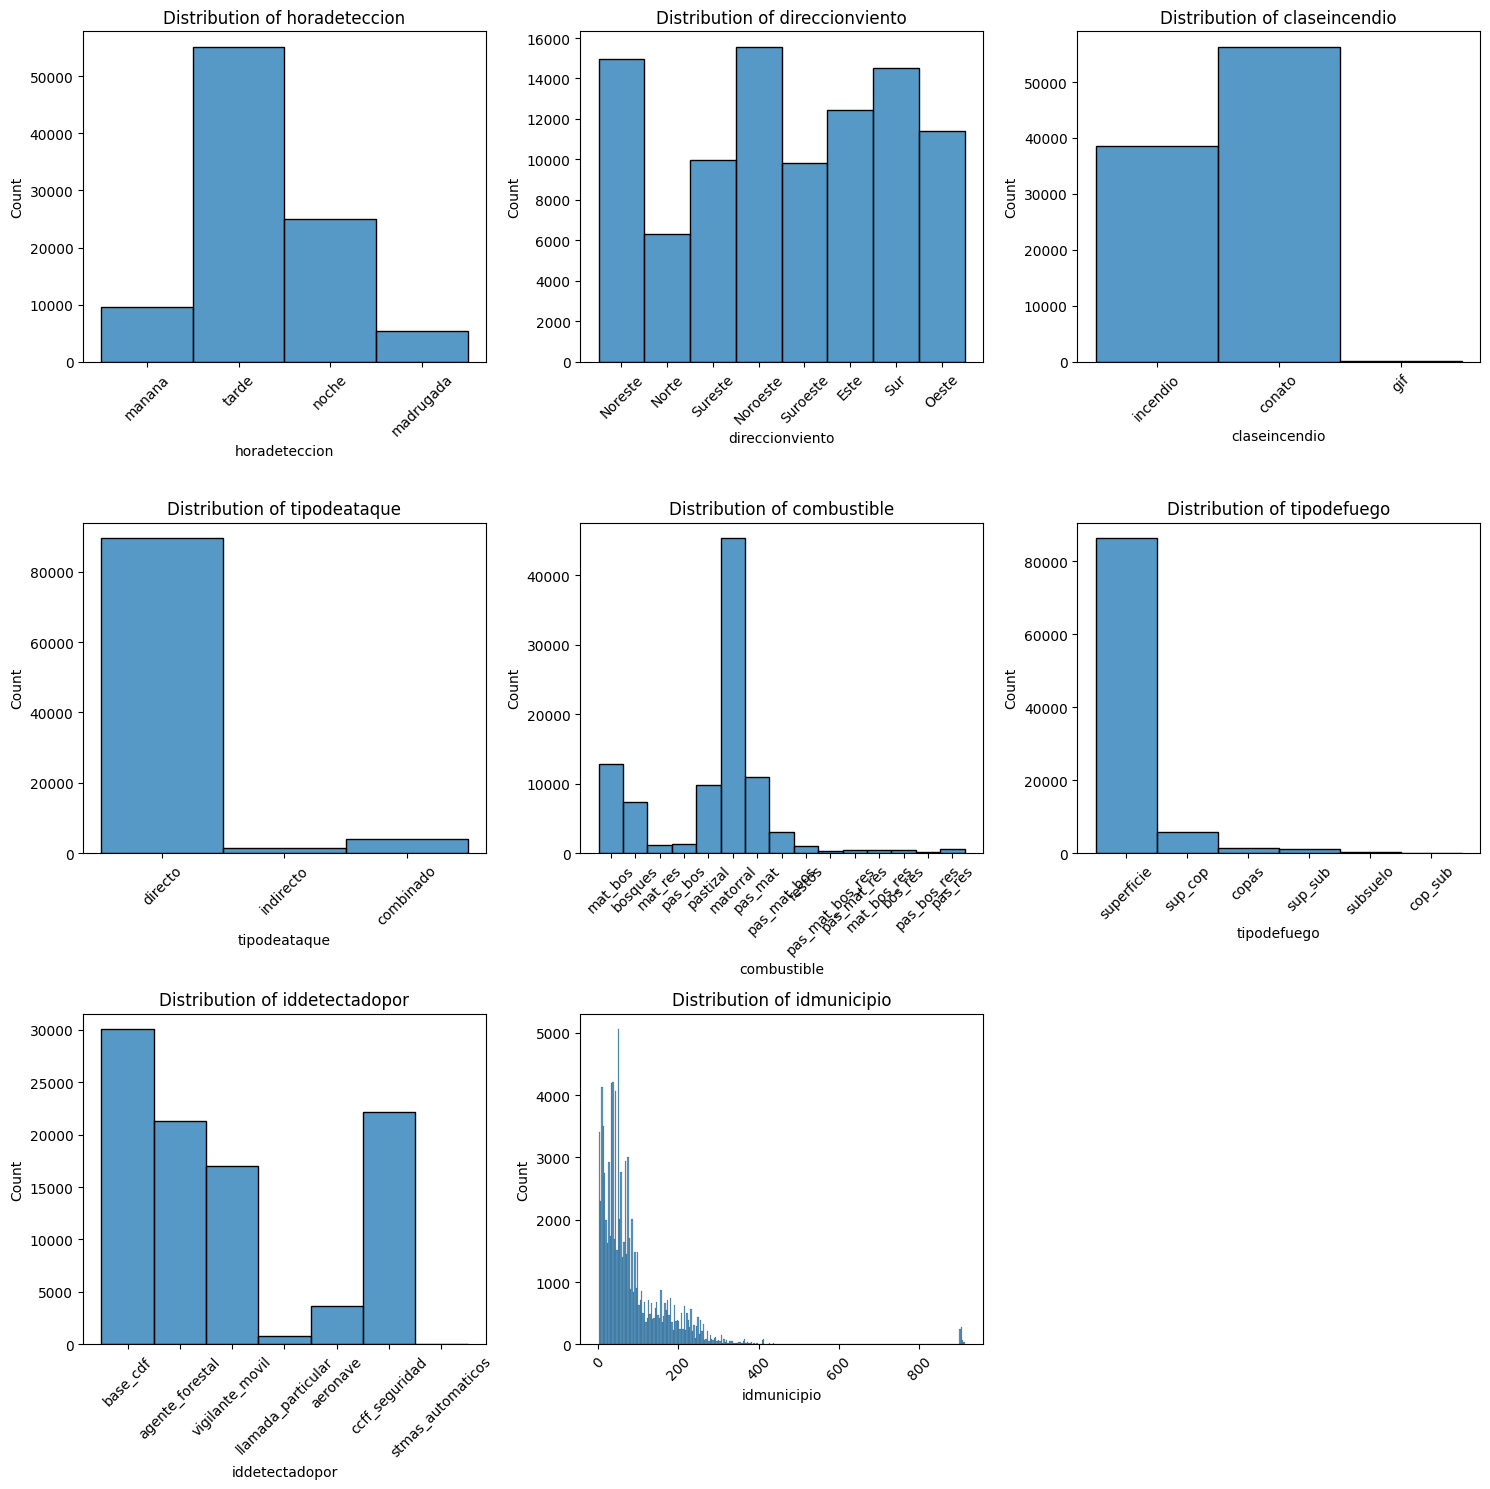

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define categorical variables to analyze (including two new variables)
categorical_vars = ['horadeteccion', 'direccionviento', 'claseincendio', 'tipodeataque', 
                    'combustible', 'tipodefuego', 'iddetectadopor', 'idmunicipio']  

# Dynamically determine rows and columns for subplots
num_vars = len(categorical_vars)
cols = 3  # Fixed number of columns
rows = math.ceil(num_vars / cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through the variables and plot
for i, var in enumerate(categorical_vars):
    sns.histplot(data=incendios_cleaned, x=var, ax=axes[i], kde=False)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x', rotation=45)  

# Hide unused subplots
for i in range(len(categorical_vars), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


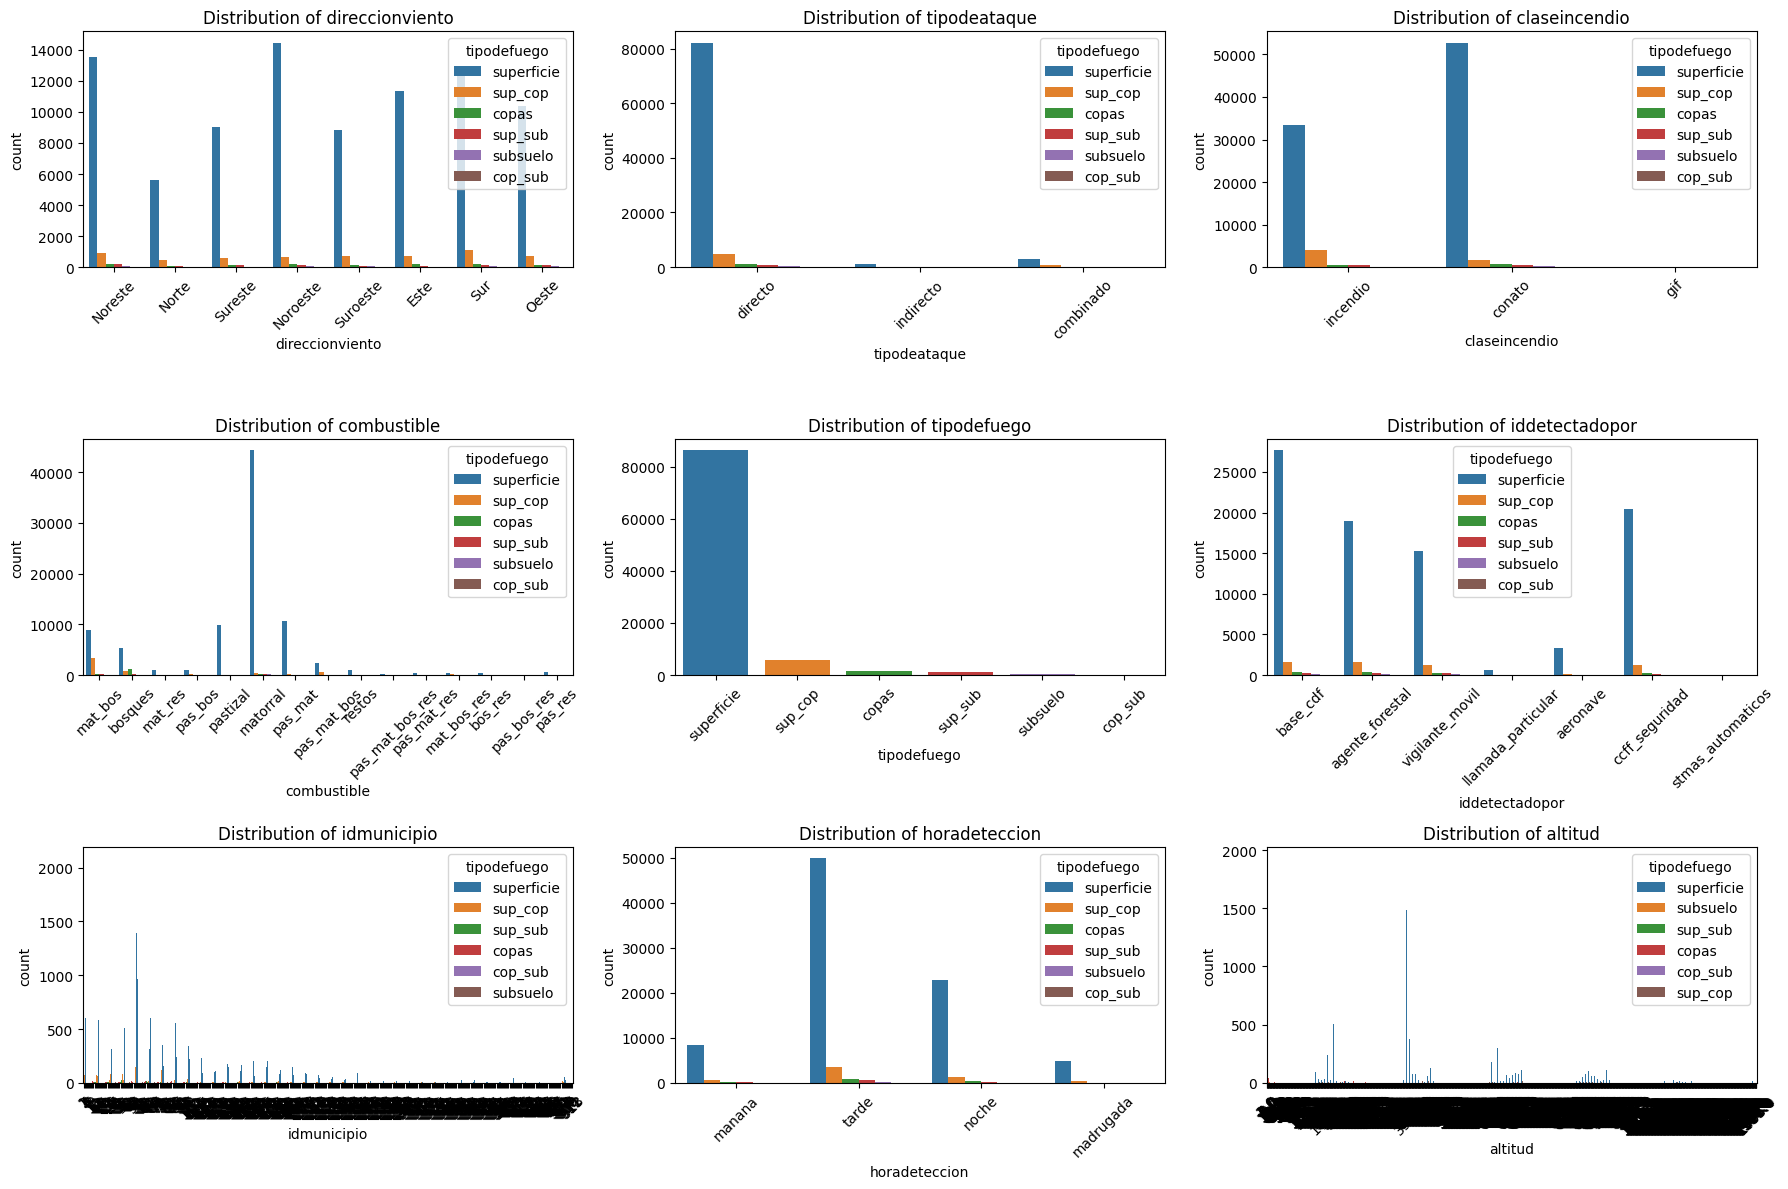

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical variables to plot
categorical_vars = ["direccionviento", "tipodeataque", "claseincendio", 
                    "combustible", "tipodefuego", "iddetectadopor", 
                    "idmunicipio", "horadeteccion", "altitud"]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through variables and plot count plots
for i, var in enumerate(categorical_vars):
    sns.countplot(ax=axes[i], data=incendios_cleaned, x=var, hue="tipodefuego")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].tick_params(axis='x', rotation=45)  # Improve readability

# Hide unused subplots (if any)
for i in range(len(categorical_vars), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


- Analysis of numerical variables:

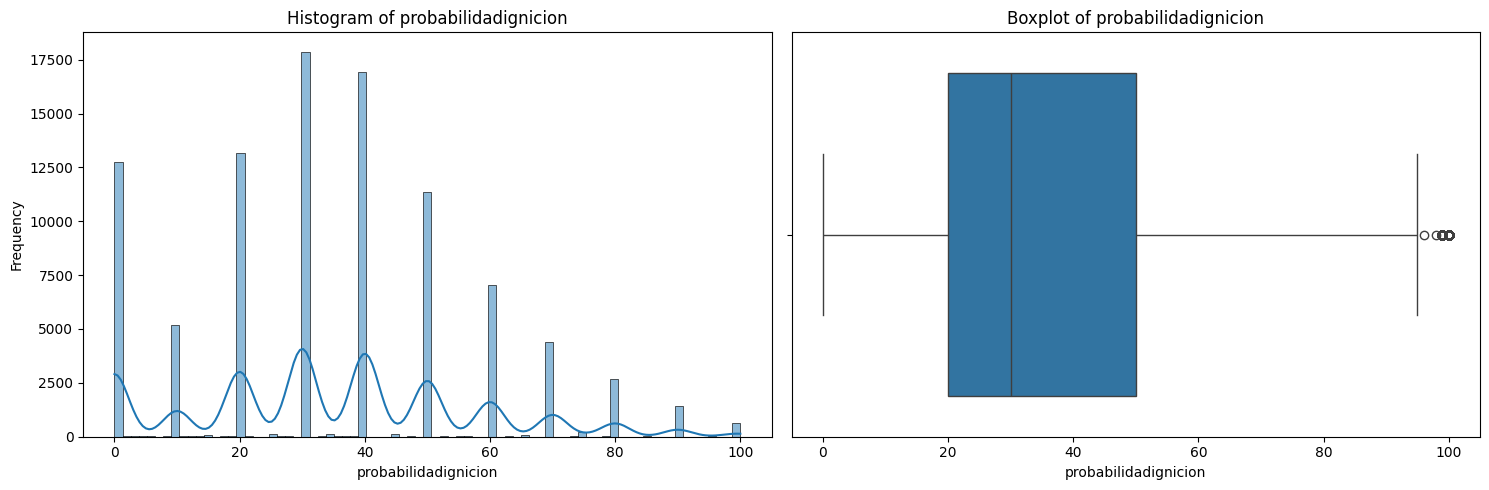

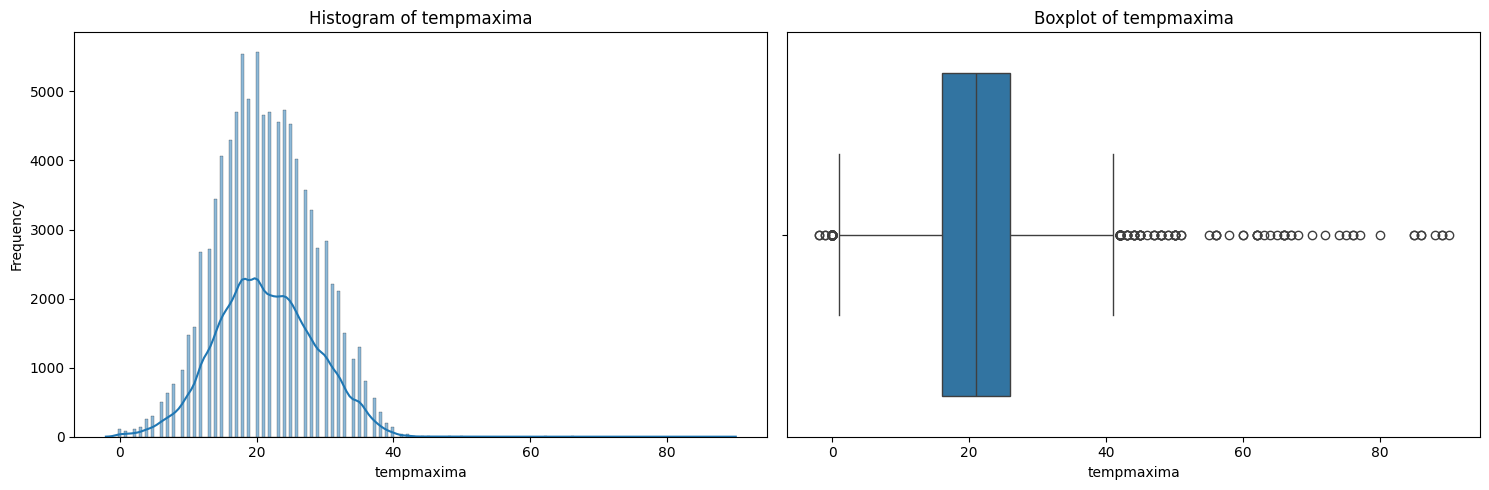

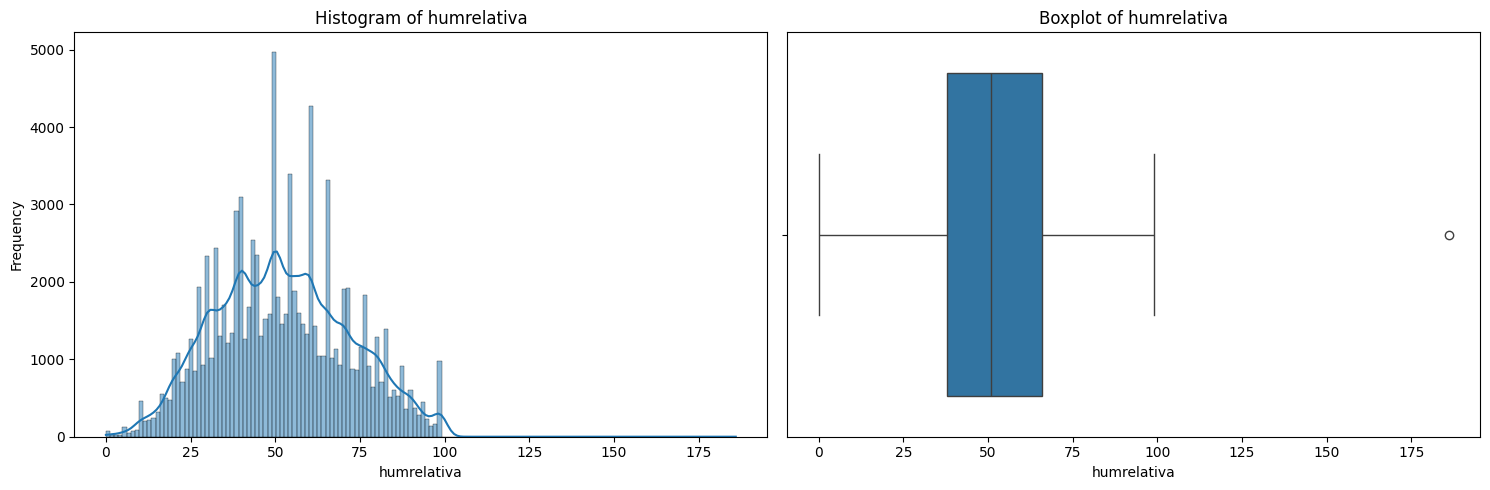

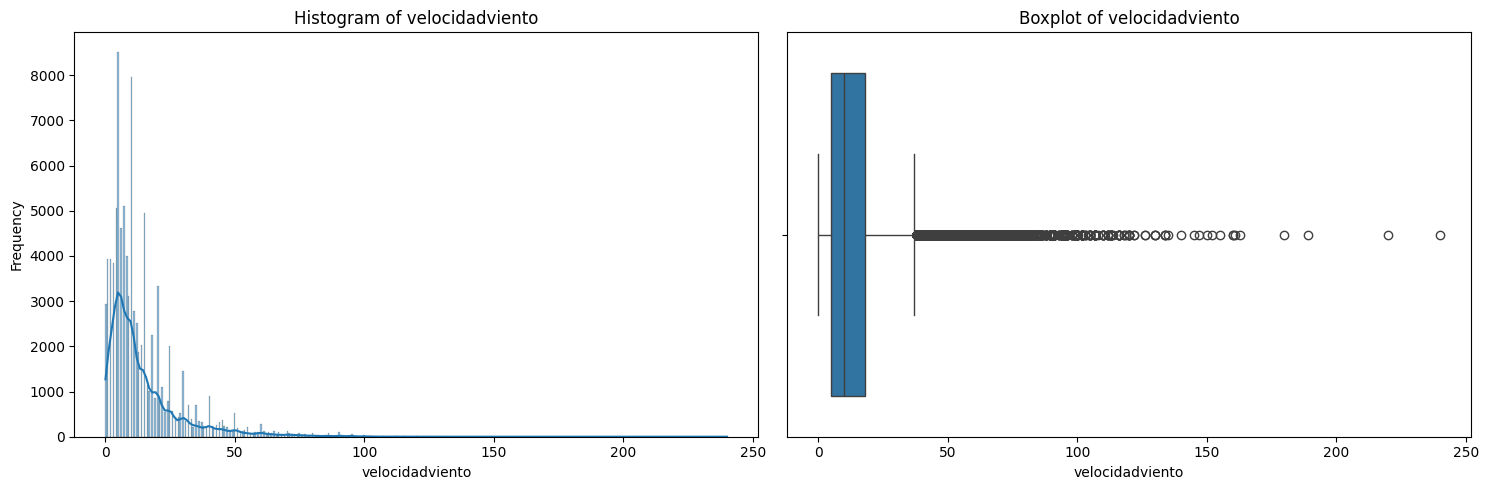

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['probabilidadignicion', 'tempmaxima', 'humrelativa', 'velocidadviento']

# Remove rows with missing or problematic values for the selected variables
cleaned_data = incendios_cleaned[variables].dropna()

# Iterate through variables and plot them individually
for var in variables:
    # Create a new figure for each variable
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # Histogram (left plot)
    sns.histplot(ax=axes[0], data=cleaned_data, x=var, kde=True)
    axes[0].set_title(f"Histogram of {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')
    
    # Boxplot (right plot)
    sns.boxplot(ax=axes[1], data=cleaned_data, x=var)
    axes[1].set_title(f"Boxplot of {var}")
    axes[1].set_xlabel(var)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [20]:
incendios_cleaned.shape

(94974, 32)

In [21]:
 #Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para 'perdidassuperficiales'
Q1_per = incendios_cleaned['perdidassuperficiales'].quantile(0.25)
Q3_per= incendios_cleaned['perdidassuperficiales'].quantile(0.75)
IQR_per = Q3_per - Q1_per

# Definir los límites inferior y superior para 'duracion'
lower_limit_perdidas = Q1_per - 1.5 * IQR_per
upper_limit_perdidas = Q3_per + 1.5 * IQR_per

# Imprimir los resultados

In [22]:
# Contar cuántos valores superan el límite superior
outliers_superiores = incendios_cleaned[incendios_cleaned['perdidassuperficiales'] > upper_limit_perdidas]
num_outliers_superiores = len(outliers_superiores)

# Imprimir el resultado
print(f"Límite superior: {upper_limit_perdidas}")
print(f"Número de valores por encima del límite superior: {num_outliers_superiores}")

# (Opcional) Imprimir el porcentaje de valores que son outliers superiores
total_valores = len(incendios_cleaned)
porcentaje_outliers_superiores = (num_outliers_superiores / total_valores) * 100
print(f"Porcentaje de valores por encima del límite superior: {porcentaje_outliers_superiores:.2f}%")

# (Opcional) Mostrar los valores atípicos superiores
print("\nValores atípicos superiores:")
outliers_superiores

Límite superior: 7.35
Número de valores por encima del límite superior: 12481
Porcentaje de valores por encima del límite superior: 13.14%

Valores atípicos superiores:


,anio,probabilidadignicion,comunidad,idprovincia,provincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,deteccion,extinguido,horadeteccion,mesdeteccion,duracion,primeranotificaciondesde112,iddetectadopor,intencionalidad,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,direccionviento,perdidassuperficiales,numeromediospersonal,numeromediospesados,numeromediosaereos,claseincendio,lugar,combustible,tipodefuego,tipodeataque
71837,1983,0.0,Comunidad Valenciana,12,Castellon,76,39.939,-0.468,594.0,1,25/02/1983,25/02/1983,manana,febrero,0,FALSO,base_cdf,supuesto_no_intencionado,15.0,14.0,15.0,7.0,Noreste,10.00,20,0,0,incendio,otros,mat_bos,superficie,directo
113686,1988,0.0,Castilla La Mancha,16,Cuenca,258,39.870,-1.627,990.0,1,28/09/1988,29/09/1988,manana,septiembre,1,FALSO,agente_forestal,supuesto_intencionado,44.0,30.0,38.0,8.0,Sureste,121.00,260,25,0,incendio,otros,mat_res,sup_cop,combinado
121188,1989,0.0,Castilla y Leon,5,Avila,221,40.251,-5.003,724.0,1,23/08/1989,23/08/1989,tarde,agosto,0,FALSO,agente_forestal,supuesto_intencionado,83.0,36.0,30.0,2.0,Suroeste,50.00,335,45,0,incendio,excursionistas,bosques,copas,combinado
122010,1989,0.0,Castilla y Leon,9,Burgos,217,42.831,-3.543,618.0,1,31/07/1989,31/07/1989,tarde,julio,0,FALSO,vigilante_movil,supuesto_no_intencionado,9.0,32.0,63.0,1.0,Este,8.00,42,0,0,incendio,otros,matorral,superficie,directo
122129,1989,10.0,Castilla y Leon,9,Burgos,905,42.717,-3.750,747.0,1,14/08/1989,14/08/1989,noche,agosto,0,FALSO,agente_forestal,supuesto_no_intencionado,7.0,33.0,54.0,2.0,Este,20.00,30,0,0,incendio,lineaselectricas,pastizal,superficie,directo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584507,2016,40.0,Castilla y Leon,9,Burgos,91,42.290,-4.143,808.0,2,12/09/2016,17/09/2016,tarde,septiembre,5,VERDADERO,ccff_seguridad,supuesto_intencionado,42.0,30.0,47.0,5.0,Noreste,19.70,165,15,30,incendio,viasferreas,mat_bos_res,sup_cop,combinado
584517,2016,20.0,Castilla y Leon,9,Burgos,98,42.493,-3.136,704.0,1,28/10/2016,28/10/2016,tarde,octubre,0,VERDADERO,ccff_seguridad,no_intencionado,0.0,14.0,63.0,3.0,Suroeste,8.66,11,2,0,incendio,otros,pas_bos_res,superficie,directo
584538,2016,20.0,Castilla y Leon,9,Burgos,410,43.101,-3.282,311.0,1,04/05/2016,04/05/2016,tarde,mayo,0,FALSO,base_cdf,intencionado,4.0,25.0,78.0,1.0,Noreste,13.74,36,0,4,incendio,lineaselectricas,pas_mat_bos,superficie,directo
584547,2016,60.0,Castilla y Leon,9,Burgos,32,41.984,-3.827,877.0,1,19/07/2016,19/07/2016,tarde,julio,0,FALSO,vigilante_movil,no_intencionado,12.0,35.0,32.0,37.0,Suroeste,10.75,42,5,15,incendio,otros,pas_mat_bos_res,superficie,directo


In [23]:
#Definir los límites inferior y superior
lower_limit = Q1_per - 3 * IQR_per
upper_limit = Q3_per + 3 * IQR_per

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR_per, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.7 y -8.6, con un rango intercuartílico de 2.9


In [24]:
incendios_cleaned = incendios_cleaned[incendios_cleaned["perdidassuperficiales"] <= 11.7]


incendios_cleaned.shape


(86137, 32)

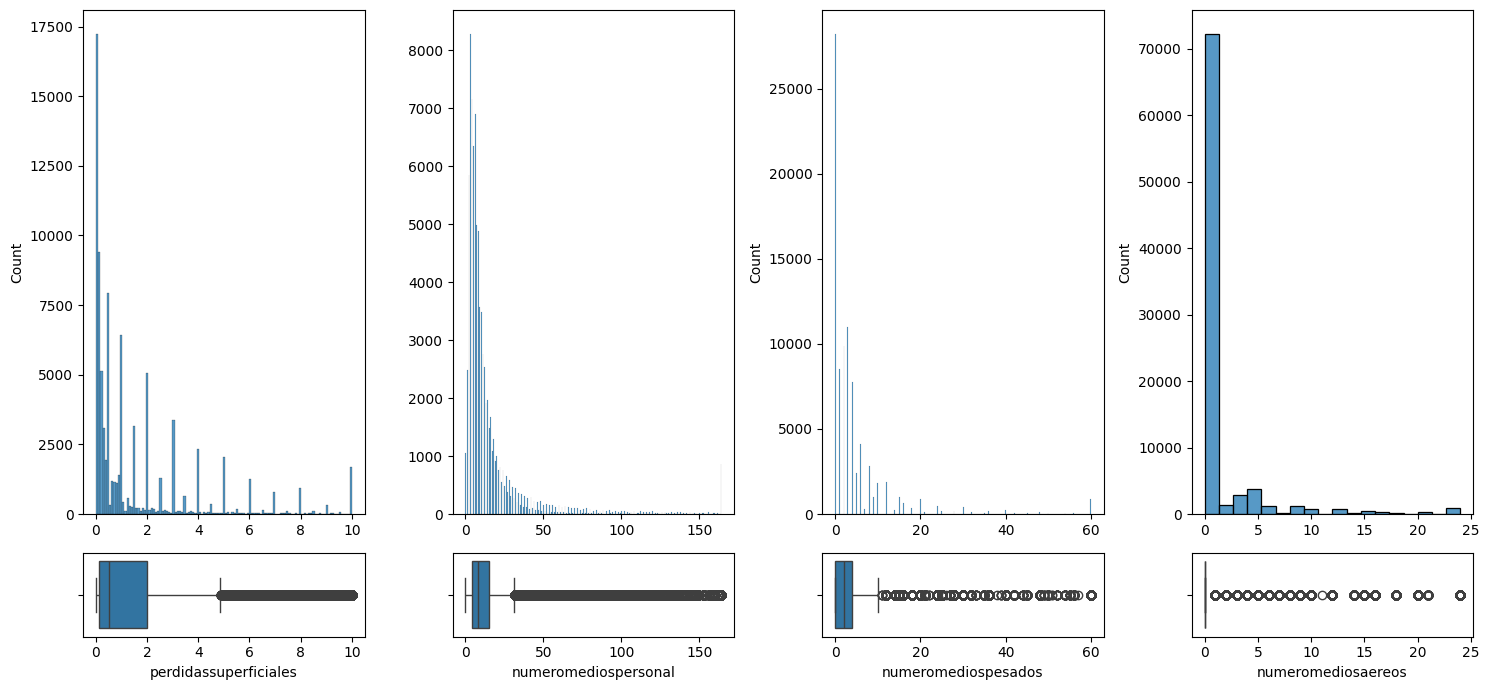

In [25]:
# Apply outlier clipping
for col in ['perdidassuperficiales', 'numeromediospersonal', 
            'numeromediospesados', 'numeromediosaereos']:
    incendios_cleaned[col] = incendios_cleaned[col].clip(upper=incendios_cleaned[col].quantile(0.99))

# Plot the histograms and boxplots
fig, axis = plt.subplots(2, 4, figsize=(15, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and boxplots
sns.histplot(ax=axis[0, 0], data=incendios_cleaned, x="perdidassuperficiales").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=incendios_cleaned, x="perdidassuperficiales")
sns.histplot(ax=axis[0, 1], data=incendios_cleaned, x="numeromediospersonal").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=incendios_cleaned, x="numeromediospersonal")
sns.histplot(ax=axis[0, 2], data=incendios_cleaned, x="numeromediospesados").set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=incendios_cleaned, x="numeromediospesados")
sns.histplot(ax=axis[0, 3], data=incendios_cleaned, x="numeromediosaereos").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=incendios_cleaned, x="numeromediosaereos")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**3. Numerical - Categorical Analysis**

- Categorical Encoding for representation:

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables for analysis
numerical_vars = ['probabilidadignicion', 'diasultimalluvia', 'tempmaxima', 'velocidadviento', 
                  'humrelativa', 'numeromediospersonal', 'nummunicipiosafectados',
                  'numeromediospesados', 'numeromediosaereos', 'duracion', 'altitud', 'latitud', 'longitud']

categorical_vars = ['direccionviento','tipodeataque','comunidad','idprovincia','provincia','deteccion','extinguido',
                    'horadeteccion','mesdeteccion','primeranotificaciondesde112','intencionalidad','claseincendio',
                    'lugar','combustible','tipodefuego','anio','iddetectadopor','idmunicipio']

---------------------------------------

In [27]:
print(incendios_cleaned.columns)

Index(['anio', 'probabilidadignicion', 'comunidad', 'idprovincia', 'provincia',
       'idmunicipio', 'latitud', 'longitud', 'altitud',
       'nummunicipiosafectados', 'deteccion', 'extinguido', 'horadeteccion',
       'mesdeteccion', 'duracion', 'primeranotificaciondesde112',
       'iddetectadopor', 'intencionalidad', 'diasultimalluvia', 'tempmaxima',
       'humrelativa', 'velocidadviento', 'direccionviento',
       'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados',
       'numeromediosaereos', 'claseincendio', 'lugar', 'combustible',
       'tipodefuego', 'tipodeataque'],
      dtype='object')


-------------------------------------------------------------------------

Encoding variables categóricas

In [28]:
# Step 1. Encoding categorical variables and save them in the dataset
for var in categorical_vars:
    incendios_cleaned[f"{var}_n"] = pd.factorize(incendios_cleaned[var])[0]

# Paso 2: Reemplazar variables originales
incendios_cleaned.drop(categorical_vars, axis=1, inplace=True)

# Save changes to the dataset
incendios_cleaned.to_csv("/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv", index=False)

--------------------------------------------------------------------------

In [29]:
print(incendios_cleaned.columns)

Index(['probabilidadignicion', 'latitud', 'longitud', 'altitud',
       'nummunicipiosafectados', 'duracion', 'diasultimalluvia', 'tempmaxima',
       'humrelativa', 'velocidadviento', 'perdidassuperficiales',
       'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos',
       'direccionviento_n', 'tipodeataque_n', 'comunidad_n', 'idprovincia_n',
       'provincia_n', 'deteccion_n', 'extinguido_n', 'horadeteccion_n',
       'mesdeteccion_n', 'primeranotificaciondesde112_n', 'intencionalidad_n',
       'claseincendio_n', 'lugar_n', 'combustible_n', 'tipodefuego_n',
       'anio_n', 'iddetectadopor_n', 'idmunicipio_n'],
      dtype='object')


--------------------------------------------------------------------------------------------

Escalado variables numéricas

In [30]:
from sklearn.preprocessing import RobustScaler

# Crear el Robust Scaler
scaler = RobustScaler()

# Ajustar y transformar los datos numéricos
incendios_cleaned[numerical_vars] = scaler.fit_transform(incendios_cleaned[numerical_vars])

# Cambiar el nombre de las variables numéricas escaladas
for var in numerical_vars:
    incendios_cleaned.rename(columns={var: var + '_r'}, inplace=True)





In [31]:
incendios_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86137 entries, 71837 to 584722
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   probabilidadignicion_r         86137 non-null  float64
 1   latitud_r                      86137 non-null  float64
 2   longitud_r                     86137 non-null  float64
 3   altitud_r                      86137 non-null  float64
 4   nummunicipiosafectados_r       86137 non-null  float64
 5   duracion_r                     86137 non-null  float64
 6   diasultimalluvia_r             86137 non-null  float64
 7   tempmaxima_r                   86137 non-null  float64
 8   humrelativa_r                  86137 non-null  float64
 9   velocidadviento_r              86137 non-null  float64
 10  perdidassuperficiales          86137 non-null  float64
 11  numeromediospersonal_r         86137 non-null  float64
 12  numeromediospesados_r          86137 non-null 

In [32]:
print(incendios_cleaned.columns)

Index(['probabilidadignicion_r', 'latitud_r', 'longitud_r', 'altitud_r',
       'nummunicipiosafectados_r', 'duracion_r', 'diasultimalluvia_r',
       'tempmaxima_r', 'humrelativa_r', 'velocidadviento_r',
       'perdidassuperficiales', 'numeromediospersonal_r',
       'numeromediospesados_r', 'numeromediosaereos_r', 'direccionviento_n',
       'tipodeataque_n', 'comunidad_n', 'idprovincia_n', 'provincia_n',
       'deteccion_n', 'extinguido_n', 'horadeteccion_n', 'mesdeteccion_n',
       'primeranotificaciondesde112_n', 'intencionalidad_n', 'claseincendio_n',
       'lugar_n', 'combustible_n', 'tipodefuego_n', 'anio_n',
       'iddetectadopor_n', 'idmunicipio_n'],
      dtype='object')


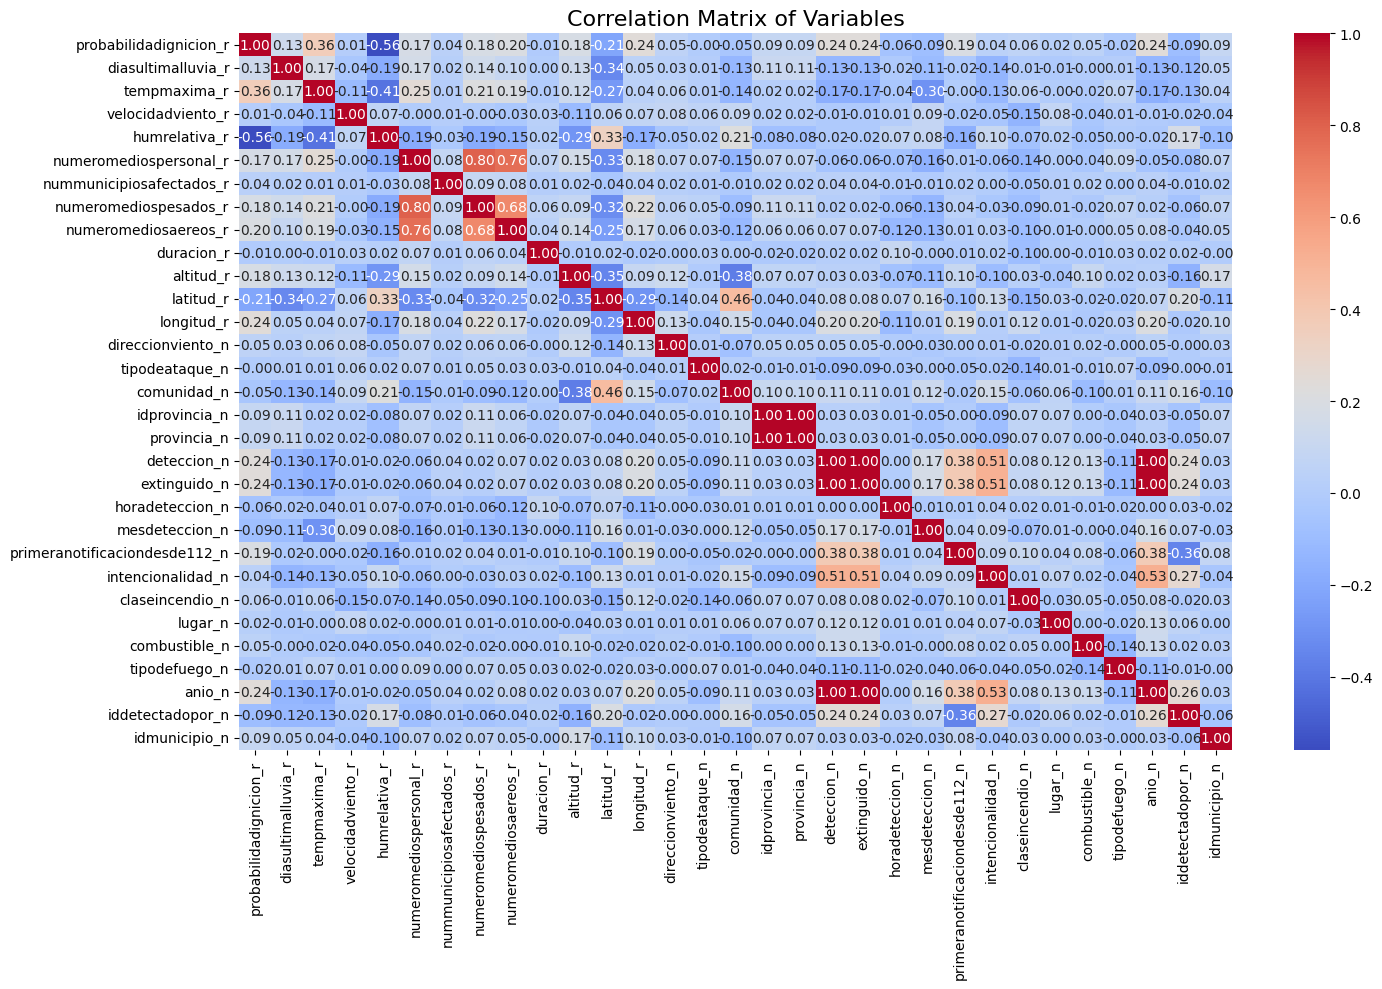

In [33]:
# Step 2: Select numerical and encoded categorical variables
analysis_vars = [f"{var}_r" for var in numerical_vars] + [f"{var}_n" for var in categorical_vars]

# Step 3: Compute correlation matrix
correlation_matrix = incendios_cleaned[analysis_vars].corr()

# Step 4: Plot heatmap
fig, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title and adjust layout
axis.set_title("Correlation Matrix of Variables", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

ADRIAN 22/01/2025

----------------------------------------------------------------------------------------

In [34]:
incendios_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86137 entries, 71837 to 584722
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   probabilidadignicion_r         86137 non-null  float64
 1   latitud_r                      86137 non-null  float64
 2   longitud_r                     86137 non-null  float64
 3   altitud_r                      86137 non-null  float64
 4   nummunicipiosafectados_r       86137 non-null  float64
 5   duracion_r                     86137 non-null  float64
 6   diasultimalluvia_r             86137 non-null  float64
 7   tempmaxima_r                   86137 non-null  float64
 8   humrelativa_r                  86137 non-null  float64
 9   velocidadviento_r              86137 non-null  float64
 10  perdidassuperficiales          86137 non-null  float64
 11  numeromediospersonal_r         86137 non-null  float64
 12  numeromediospesados_r          86137 non-null 

In [35]:
incendios_cleaned.describe()

,probabilidadignicion_r,latitud_r,longitud_r,altitud_r,nummunicipiosafectados_r,duracion_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,velocidadviento_r,perdidassuperficiales,numeromediospersonal_r,numeromediospesados_r,numeromediosaereos_r,direccionviento_n,tipodeataque_n,comunidad_n,idprovincia_n,provincia_n,deteccion_n,extinguido_n,horadeteccion_n,mesdeteccion_n,primeranotificaciondesde112_n,intencionalidad_n,claseincendio_n,lugar_n,combustible_n,tipodefuego_n,anio_n,iddetectadopor_n,idmunicipio_n
count,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000,86137.00000,86137.000000,86137.000000,86137.000000,86137.000000,86137.000000
mean,0.162095,-0.264727,0.146002,0.123895,0.004609,0.134042,0.430822,0.037758,0.038489,0.295857,1.546142,0.631824,0.640024,1.220544,3.417591,0.065512,7.585056,18.747994,18.747994,3662.521553,3683.170844,1.283212,4.373928,0.130989,1.193320,0.652913,1.39544,3.575931,0.129073,16.118996,1.943485,130.192194
std,0.749541,0.813944,0.752061,0.627639,0.070751,0.751182,1.468829,0.715711,0.701382,1.098878,2.237001,2.179137,2.182175,3.651588,2.263991,0.338357,4.034119,10.204697,10.204697,2176.672801,2186.604388,0.707288,3.060683,0.337390,0.967348,0.476046,1.86875,2.151285,0.517872,7.834776,1.962009,84.635143
min,-1.000000,-7.326653,-3.462779,-0.683301,0.000000,0.000000,-0.636364,-2.300000,-1.821429,-0.769231,0.000000,-0.727273,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333333,-0.645792,-0.364687,-0.391555,0.000000,0.000000,-0.363636,-0.500000,-0.464286,-0.384615,0.100000,-0.363636,-0.500000,0.000000,2.000000,0.000000,3.000000,14.000000,14.000000,1739.000000,1748.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,9.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,4.000000,0.000000,9.000000,15.000000,15.000000,3692.000000,3718.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.00000,4.000000,0.000000,17.000000,1.000000,118.000000
75%,0.666667,0.354208,0.635313,0.608445,0.000000,0.000000,0.636364,0.500000,0.535714,0.615385,2.000000,0.636364,0.500000,0.000000,5.000000,0.000000,10.000000,22.000000,22.000000,5621.000000,5653.000000,2.000000,7.000000,0.000000,2.000000,1.000000,2.00000,4.000000,0.000000,23.000000,4.000000,203.000000
max,2.333333,0.597194,2.505509,2.568138,2.000000,153.000000,73.818182,6.800000,4.821429,17.692308,10.000000,14.181818,14.500000,24.000000,7.000000,2.000000,16.000000,49.000000,49.000000,7589.000000,7625.000000,3.000000,11.000000,1.000000,3.000000,1.000000,7.00000,14.000000,5.000000,29.000000,6.000000,450.000000



#Posibles outliers

nummunicipiosafectados: Hay valores superiores al Valores superiores a 1 (el percentil 75). Es probable que esta variable este relacionada con la duracion y las perdidas superficiales, voy a revisar si viene provocada por unos pocos registros y si sería interesante eliminarlos.

duracion: Valores mucho mayores a 14. Estos incendios de larga duración merecen una atención especial. Podrían indicar condiciones inusuales que dificultaron la extinción.

perdidas_superficiales: Valores significativamente mayores a 19. Estos incendios causaron pérdidas superficiales mucho mayores que la mayoría, lo que los convierte en posibles valores atípicos.

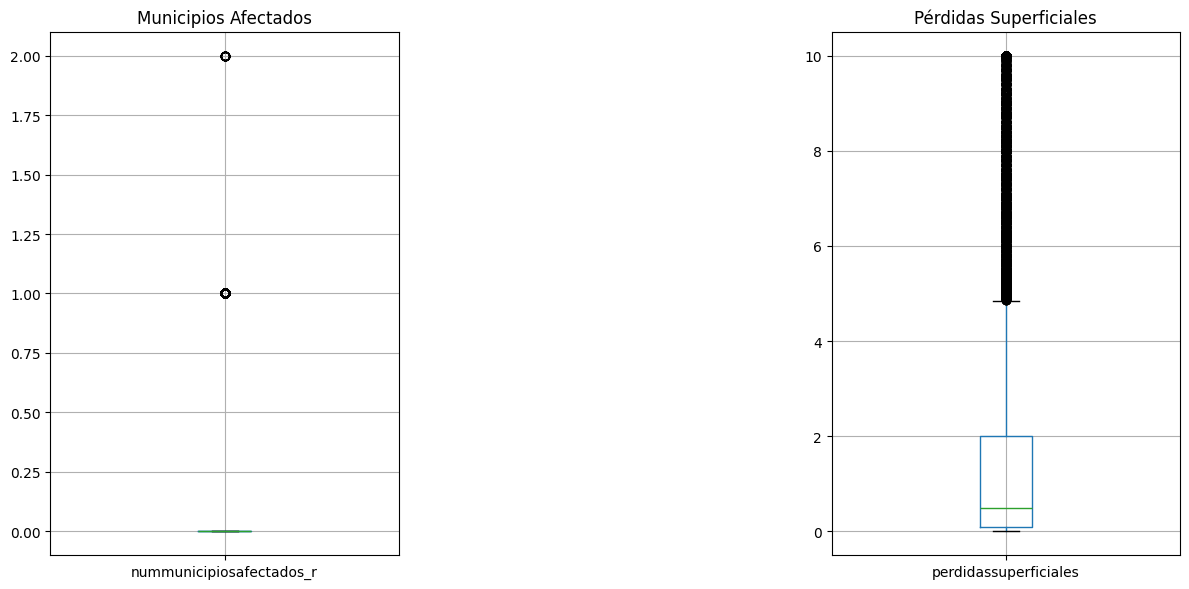


Estadísticas descriptivas para incendios con duración > 14:


,probabilidadignicion_r,latitud_r,longitud_r,altitud_r,nummunicipiosafectados_r,duracion_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,velocidadviento_r,perdidassuperficiales,numeromediospersonal_r,numeromediospesados_r,numeromediosaereos_r,direccionviento_n,tipodeataque_n,comunidad_n,idprovincia_n,provincia_n,deteccion_n,extinguido_n,horadeteccion_n,mesdeteccion_n,primeranotificaciondesde112_n,intencionalidad_n,claseincendio_n,lugar_n,combustible_n,tipodefuego_n,anio_n,iddetectadopor_n,idmunicipio_n
460391,0.333333,0.441383,-0.472991,0.186180,0.0,63.0,-0.181818,0.6,0.285714,-0.076923,4.00,2.363636,1.50,0.0,3,0,10,14,14,4194,4246,2,2,0,2,0,0,4,0,19,0,207
467307,-0.333333,-1.017034,1.402311,0.170825,0.0,153.0,0.272727,-1.3,0.428571,2.692308,0.20,0.545455,1.50,0.0,2,0,0,0,0,4587,4611,0,9,0,0,1,0,4,0,20,2,28
516834,0.000000,0.264529,0.404461,0.748560,0.0,59.0,-0.636364,-0.1,0.500000,0.000000,0.03,-0.727273,-0.50,0.0,2,0,3,3,3,5807,5896,0,0,0,3,1,2,5,0,24,2,141
538703,0.500000,-0.960421,0.463854,0.690979,0.0,30.0,2.909091,1.7,-1.357143,0.384615,1.62,11.272727,14.50,24.0,0,0,13,27,27,6257,6294,1,2,1,2,0,0,5,0,25,0,83
566985,0.666667,-0.827154,0.181134,1.147793,0.0,58.0,-0.363636,-0.6,-0.500000,-0.076923,0.10,2.818182,4.75,0.0,2,0,3,18,18,6772,6924,1,7,0,1,1,5,7,0,27,0,20
576126,-0.666667,0.394289,-0.364687,0.608445,0.0,33.0,-0.181818,-0.5,1.357143,-0.615385,4.41,1.272727,0.25,0.0,2,0,10,14,14,7085,7323,2,3,0,3,0,6,0,1,28,5,218


In [36]:
 #Diagramas de caja
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
incendios_cleaned.boxplot(column='nummunicipiosafectados_r')
plt.title('Municipios Afectados')


plt.subplot(1, 3, 3)
incendios_cleaned.boxplot(column='perdidassuperficiales')
plt.title('Pérdidas Superficiales')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas para valores atípicos potenciales en 'duracion'
outliers_duracion = incendios_cleaned[incendios_cleaned['duracion_r'] > 14]
print("\nEstadísticas descriptivas para incendios con duración > 14:")
outliers_duracion

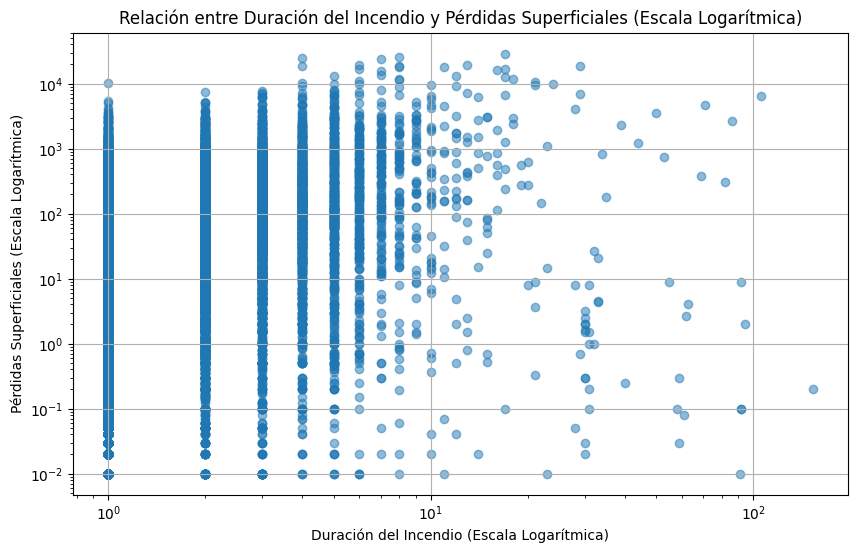

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(incendios['duracion'], incendios['perdidassuperficiales'], alpha=0.5)
plt.xlabel('Duración del Incendio (Escala Logarítmica)')
plt.ylabel('Pérdidas Superficiales (Escala Logarítmica)')
plt.title('Relación entre Duración del Incendio y Pérdidas Superficiales (Escala Logarítmica)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Si bien parece obio que hay una relacion entre la duracion del incendio y las péridas superficiales, todavía no tengo muy claro si es necesario eliminar estos outliers

Ya hemos eliminado un buen número de registros desde el comienzo del proyecto, un 12.5% me parece un número demasiado elevado, voy a probar eliminando menos.

Siguen siendo demasiado altos, voy a aparcar por ahora este tema y pasar a los valores faltantes

EL MISMO EJERCICIO QUE ANTES, PERO PARA LA DURACIÓN

In [38]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para 'duracion'
Q1_duracion = incendios_cleaned['duracion_r'].quantile(0.25)
Q3_duracion = incendios_cleaned['duracion_r'].quantile(0.75)
IQR_duracion = Q3_duracion - Q1_duracion

# Definir los límites inferior y superior para 'duracion'
lower_limit_duracion = Q1_duracion - 1.5 * IQR_duracion
upper_limit_duracion = Q3_duracion + 1.5 * IQR_duracion

# Imprimir los resultados
print(f"Los límites superior e inferior para la búsqueda de outliers en 'duracion' son {round(upper_limit_duracion, 2)} y {round(lower_limit_duracion, 2)}, con un rango intercuartílico de {round(IQR_duracion, 2)}")

Los límites superior e inferior para la búsqueda de outliers en 'duracion' son 0.0 y 0.0, con un rango intercuartílico de 0.0


no entiendi porque me sale 0...tengo que investigar

VALORES FALTANTES

In [39]:
incendios_cleaned.isnull().sum().sort_values(ascending=False)

probabilidadignicion_r           0
latitud_r                        0
longitud_r                       0
altitud_r                        0
nummunicipiosafectados_r         0
duracion_r                       0
diasultimalluvia_r               0
tempmaxima_r                     0
humrelativa_r                    0
velocidadviento_r                0
perdidassuperficiales            0
numeromediospersonal_r           0
numeromediospesados_r            0
numeromediosaereos_r             0
direccionviento_n                0
tipodeataque_n                   0
comunidad_n                      0
idprovincia_n                    0
provincia_n                      0
deteccion_n                      0
extinguido_n                     0
horadeteccion_n                  0
mesdeteccion_n                   0
primeranotificaciondesde112_n    0
intencionalidad_n                0
claseincendio_n                  0
lugar_n                          0
combustible_n                    0
tipodefuego_n       

NO HAY FALTANTES!!

FEATURE ENGENEERING

In [40]:
 #Unir latitud y longitud en "coordenadas"
incendios_cleaned["coordenadas"] = incendios_cleaned["latitud_r"].astype(str) + ", " + incendios_cleaned["longitud_r"].astype(str)

print(incendios_cleaned)

#Eliminamos variables "longitud" y "latitud" ya que las hemos integrado en coordenadas
incendios_cleaned = incendios_cleaned.drop(['latitud_r', 'longitud_r'], axis=1)
print("\nDataFrame con la columna 'coordenadas' y sin 'latitud' ni 'longitud':")
print(incendios_cleaned)

        probabilidadignicion_r  latitud_r  longitud_r  altitud_r  \
71837                -1.000000  -1.307114    1.233539   0.454894   
102000               -1.000000   0.275551    0.620263   0.088292   
110834               -1.000000   0.400301    0.690943  -0.328215   
120803               -1.000000  -2.095190    0.794679   0.725528   
120809               -1.000000  -2.007515    0.833916   0.545106   
...                        ...        ...         ...        ...   
584715                0.333333  -0.505010    0.096479   0.698656   
584717                1.000000   0.051102   -0.490460   0.452975   
584719                0.000000  -0.000501   -0.514109   0.942418   
584720                0.000000   0.051102   -0.490460   0.452975   
584722               -0.666667   0.112725   -0.238377   1.310940   

        nummunicipiosafectados_r  duracion_r  diasultimalluvia_r  \
71837                        0.0         0.0            0.727273   
102000                       0.0         0.0   

Hablar del encoding
hacemos split antes o despues?
probamos el modelo en distintas fases? 
Eliminar outliers pérdidas superficiales?

DIVIDIMOS EL CONJUNTO DE DATOS

In [41]:
# modelado
from sklearn.model_selection import train_test_split

incendios_cleaned = incendios_cleaned.drop("coordenadas", axis=1)

# Dividimos el conjunto de datos en muestras de train y test
X = incendios_cleaned.drop("perdidassuperficiales", axis = 1)
y = incendios_cleaned["perdidassuperficiales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,probabilidadignicion_r,altitud_r,nummunicipiosafectados_r,duracion_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,velocidadviento_r,numeromediospersonal_r,numeromediospesados_r,numeromediosaereos_r,direccionviento_n,tipodeataque_n,comunidad_n,idprovincia_n,provincia_n,deteccion_n,extinguido_n,horadeteccion_n,mesdeteccion_n,primeranotificaciondesde112_n,intencionalidad_n,claseincendio_n,lugar_n,combustible_n,tipodefuego_n,anio_n,iddetectadopor_n,idmunicipio_n
434427,-0.333333,0.380038,0.0,0.0,0.000000,-1.4,-0.214286,-0.615385,-0.545455,-0.25,0.0,2,0,9,13,13,4025,4054,2,7,0,0,1,0,4,0,18,5,162
400443,1.000000,1.101727,0.0,1.0,-0.545455,0.3,-0.571429,-0.384615,2.181818,2.00,0.0,0,0,3,16,16,3268,3329,2,1,0,1,0,7,6,0,16,1,344
555417,-0.333333,-0.529750,0.0,0.0,-0.545455,0.3,1.714286,-0.384615,-0.181818,-0.50,1.0,6,0,10,14,14,6709,6740,1,4,0,3,1,0,4,0,26,1,104
172831,-0.666667,0.571977,0.0,0.0,-0.545455,-0.5,1.357143,-0.461538,-0.090909,-0.50,0.0,0,0,6,10,10,911,921,2,8,0,1,1,0,4,0,6,0,23
165481,0.000000,0.955854,0.0,0.0,0.272727,0.1,1.214286,0.692308,0.363636,0.25,0.0,0,0,11,17,17,656,656,0,3,0,1,1,0,1,1,5,2,23


In [42]:
#cat_vars_1= ["comunidad", "idprovincia", "provincia", "deteccion", "extinguido", "horadeteccion", "mesdeteccion", 
 #            "primeranotificaciondesde112","intencionalidad", "claseincendio", "lugar", "combustible", "tipodefuego", 
             

In [43]:
#"tipodeataque", "idpeligro_n", 
  #           "idcausa_n", "idmotivacion_n", "tipodeataque_n", "idclasedia_n", 
   #          "claseincendio_n", "combustible_n", "tipodefuego_n", "direccionviento"]



#print(cat_vars_1)

#num_vars_1 = ["anio", "probabilidadignicion", "altitud", "nummunicipiosafectados", "diasultimalluvia", 
 #           "tempmaxima", "humrelativa", "velocidadviento", "perdidassuperficiales", 
  #          "numeromediospersonal", "numeromediospesados", "numeromediosaereos", "direccionviento_n"]




#print(num_vars_1)

Eliminada la variable coordenadas temporalmente por problemas con el escalado, no lo identifica como un númnero al ser 2 valores separados por una coma, revisar.

Tenemos el encoded para variables numericas y para las variables categóricas mas relevantes

Ahora mismo estamos haciendo un selectkbest sobre 14 variables numericas y 6 variables categóricas

Variables categóricas = cat_vars_1
Variables numéricas = num_vars_1
X_train_sel
X_test_sel

In [44]:
# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest, f_regression

In [45]:
 #Create the SelectKBest model with f_classif as the scoring function and k=5 to select the top 5 features
selection_model = SelectKBest(score_func=f_regression, k=15)

# Train the model on the training data
selection_model.fit(X_train, y_train)

# Get the indices of the selected features
selected_features = selection_model.get_support(indices=True)

# Print the names of the selected features from the original training data columns
print("Selected features:", X_train.columns[selected_features])

# Create DataFrames containing the selected features from the training and testing data
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[selected_features])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[selected_features])

# Print the head of the selected features DataFrame for training data
print("X_train_sel.head:")
print(X_train_sel.head())
X_train_sel.head()

Selected features: Index(['nummunicipiosafectados_r', 'duracion_r', 'velocidadviento_r',
       'numeromediospersonal_r', 'numeromediospesados_r',
       'numeromediosaereos_r', 'tipodeataque_n', 'idprovincia_n',
       'provincia_n', 'deteccion_n', 'extinguido_n', 'mesdeteccion_n',
       'primeranotificaciondesde112_n', 'claseincendio_n', 'anio_n'],
      dtype='object')
X_train_sel.head:
   nummunicipiosafectados_r  duracion_r  velocidadviento_r  \
0                       0.0         0.0          -0.615385   
1                       0.0         1.0          -0.384615   
2                       0.0         0.0          -0.384615   
3                       0.0         0.0          -0.461538   
4                       0.0         0.0           0.692308   

   numeromediospersonal_r  numeromediospesados_r  numeromediosaereos_r  \
0               -0.545455                  -0.25                   0.0   
1                2.181818                   2.00                   0.0   
2          

,nummunicipiosafectados_r,duracion_r,velocidadviento_r,numeromediospersonal_r,numeromediospesados_r,numeromediosaereos_r,tipodeataque_n,idprovincia_n,provincia_n,deteccion_n,extinguido_n,mesdeteccion_n,primeranotificaciondesde112_n,claseincendio_n,anio_n
0,0.0,0.0,-0.615385,-0.545455,-0.25,0.0,0.0,13.0,13.0,4025.0,4054.0,7.0,0.0,1.0,18.0
1,0.0,1.0,-0.384615,2.181818,2.00,0.0,0.0,16.0,16.0,3268.0,3329.0,1.0,0.0,0.0,16.0
2,0.0,0.0,-0.384615,-0.181818,-0.50,1.0,0.0,14.0,14.0,6709.0,6740.0,4.0,0.0,1.0,26.0
3,0.0,0.0,-0.461538,-0.090909,-0.50,0.0,0.0,10.0,10.0,911.0,921.0,8.0,0.0,1.0,6.0
4,0.0,0.0,0.692308,0.363636,0.25,0.0,0.0,17.0,17.0,656.0,656.0,3.0,0.0,1.0,5.0


## Modelado

In [46]:
from sklearn.linear_model import LinearRegression

reg_model_1 = LinearRegression()

reg_model_1.fit(X_train_sel, y_train)

LinearRegression()

In [47]:
y_pred_1 = reg_model_1.predict(X_test_sel)

In [48]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(f"RMSE: {root_mean_squared_error(y_test, y_pred_1)}")
print(f"R2: {r2_score(y_test, y_pred_1)}")

RMSE: 1.5078935658300407
R2: 0.5548697546371772


In [49]:
from sklearn.linear_model import Lasso

alpha = 1
lasso_model_1 = Lasso(alpha=alpha)

lasso_model_1.fit(X_train_sel, y_train)

Lasso(alpha=1)

In [50]:
score = lasso_model_1.score(X_test_sel, y_test)

print("R2 score:", score)

R2 score: 0.011268466167082769


In [51]:
from sklearn.linear_model import Lasso
import numpy as np

alpha_values = np.linspace(0.0001, 20.0, 20) 
r2_scores = []


for alpha in alpha_values:

    model_lasso_2 = Lasso(alpha=alpha)
    model_lasso_2.fit(X_train_sel, y_train)  
    
    y_pred_lasso = model_lasso_2.predict(X_test_sel)
    
    r2 = r2_score(y_test, y_pred_lasso)
    r2_scores.append(r2)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.358e+04, tolerance: 3.430e+01
  model = cd_fast.enet_coordinate_descent(


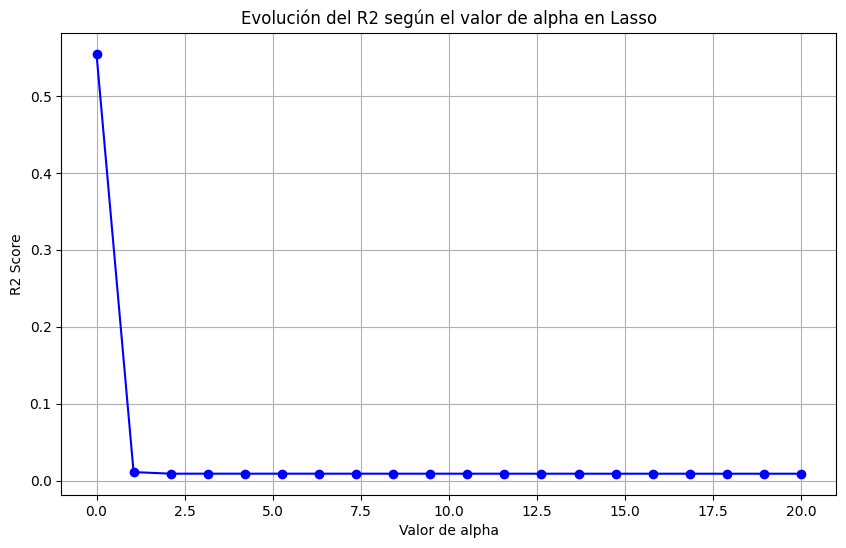

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Evolución del R2 según el valor de alpha en Lasso')
plt.xlabel('Valor de alpha')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

forest_model.fit(X_train_sel, y_train)


RandomForestRegressor(random_state=42)

In [54]:
y_pred_forest = forest_model.predict(X_test_sel)


In [55]:
rmse = root_mean_squared_error(y_test, y_pred_forest)
r2 = r2_score(y_test, y_pred_forest)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error (RMSE): 1.4904367046681546
R-squared: 0.5651166276809279


In [56]:
from sklearn.model_selection import RandomizedSearchCV

'''
forest_grid = RandomForestRegressor(random_state=42)

param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=forest_grid,
    param_distributions=param,
    n_iter=10,  # Número de combinaciones a probar
    scoring='r2',  # Métrica de evaluación
    cv=5,  # Validación cruzada
    verbose=2,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)


random_search.fit(X_train_sel, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntuación (MSE):", random_search.best_score_)
'''

print("Ponemos el código anterior como un comentario para que no se ejecute de nuevo. Los resultados obtenidos son los siguientes:")
print("Hiperparámetros: n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=20")


Ponemos el código anterior como un comentario para que no se ejecute de nuevo. Los resultados obtenidos son los siguientes:
Hiperparámetros: n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=20


In [57]:
forest_opt = RandomForestRegressor (n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=20)

forest_opt.fit (X_train_sel, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10)

In [58]:

y_pred_forest_opt = forest_opt.predict (X_test_sel)

rmse = root_mean_squared_error(y_test, y_pred_forest_opt)
r2 = r2_score(y_test, y_pred_forest_opt)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error (RMSE): 1.4459106786584215
R-squared: 0.5907123327441652


In [59]:
print(X_train_sel.isnull().sum())  # Si X_train_sel es un DataFrame de pandas


nummunicipiosafectados_r         0
duracion_r                       0
velocidadviento_r                0
numeromediospersonal_r           0
numeromediospesados_r            0
numeromediosaereos_r             0
tipodeataque_n                   0
idprovincia_n                    0
provincia_n                      0
deteccion_n                      0
extinguido_n                     0
mesdeteccion_n                   0
primeranotificaciondesde112_n    0
claseincendio_n                  0
anio_n                           0
dtype: int64


In [60]:
print(X_train_sel.dtypes) 
print(y_train.dtypes)      



nummunicipiosafectados_r         float64
duracion_r                       float64
velocidadviento_r                float64
numeromediospersonal_r           float64
numeromediospesados_r            float64
numeromediosaereos_r             float64
tipodeataque_n                   float64
idprovincia_n                    float64
provincia_n                      float64
deteccion_n                      float64
extinguido_n                     float64
mesdeteccion_n                   float64
primeranotificaciondesde112_n    float64
claseincendio_n                  float64
anio_n                           float64
dtype: object
float64


In [61]:
X_train_sel = X_train_sel.drop(columns=['idprovincia_n'])
X_test_sel = X_test_sel.drop(columns=['idprovincia_n'])

print(X_train_sel.dtypes) 


nummunicipiosafectados_r         float64
duracion_r                       float64
velocidadviento_r                float64
numeromediospersonal_r           float64
numeromediospesados_r            float64
numeromediosaereos_r             float64
tipodeataque_n                   float64
provincia_n                      float64
deteccion_n                      float64
extinguido_n                     float64
mesdeteccion_n                   float64
primeranotificaciondesde112_n    float64
claseincendio_n                  float64
anio_n                           float64
dtype: object


In [62]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)

xg_reg.fit(X_train_sel, y_train)

print(xg_reg.score(X_train_sel, y_train))



0.6759242223117911


In [63]:
from sklearn.metrics import r2_score


y_pred_xgb = xg_reg.predict(X_test_sel)


r2_score(y_test, y_pred_xgb)

0.5925281627759535

In [64]:
root_mean_squared_error(y_test, y_pred_xgb)


np.float64(1.4426996772027216)

In [65]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor (n_estimators=100, random_state=42)

lgb_reg.fit(X_train_sel, y_train)

print(lgb_reg.score(X_train_sel, y_train))



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 14
[LightGBM] [Info] Start training from score 1.543539
0.6354759722060812


In [66]:
y_pred_lgb = lgb_reg.predict(X_test_sel)


r2_score(y_test, y_pred_lgb)


0.6016666142166602

In [67]:
root_mean_squared_error(y_test, y_pred_lgb)


np.float64(1.4264300841631774)

In [68]:
'''
xgb_opt = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],  # Número de árboles
    'max_depth': [2, 4, 8, 10],           # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.03, 0.06, 0.1],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fracción de muestras utilizadas para entrenar cada árbol
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fracción de columnas utilizadas para cada árbol
    'min_child_weight': [1, 3, 5],      # Peso mínimo de las muestras de un nodo
    'gamma': [0, 0.1, 0.2],             # Valor mínimo de pérdida en cada división
    'reg_alpha': [0, 1],                # Regularización L1
    'reg_lambda': [1, 5, 10]            # Regularización L2
}

random_search_xgb = RandomizedSearchCV(estimator=xgb_opt, param_distributions=param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)

random_search_xgb.fit(X_train_sel, y_train)

best_model = random_search_xgb.best_estimator_

print("Mejores parámetros:", random_search_xgb.best_params_)

'''

print("Ponemos el código anterior como un comentario para que no se ejecute de nuevo. Los resultados obtenidos son los siguientes:")
print ("Mejores parámetros: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.8}")


Ponemos el código anterior como un comentario para que no se ejecute de nuevo. Los resultados obtenidos son los siguientes:
Mejores parámetros: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.8}


In [69]:
best_params = {
    'subsample': 1.0, 
    'reg_lambda': 1, 
    'reg_alpha': 0, 
    'n_estimators': 300, 
    'min_child_weight': 5, 
    'max_depth': 8, 
    'learning_rate': 0.03, 
    'gamma': 0, 
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'random_state': 42
}

xgb_best = xgb.XGBRegressor(**best_params)

xgb_best.fit(X_train_sel, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [70]:
y_pred_xgb_best = xgb_best.predict(X_test_sel)

r2_xgb_best = r2_score(y_test, y_pred_xgb_best)
rmse_xgb_best = root_mean_squared_error(y_test, y_pred_xgb_best)

print(f"R2 Score: {r2_xgb_best:.4f}")
print(f"RMSE: {rmse_xgb_best:.4f}")


R2 Score: 0.6008
RMSE: 1.4280


In [71]:
from sklearn.metrics import make_scorer

'''
lgb_opt = lgb.LGBMRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 500, 1000],  # Número de árboles
    'max_depth': [3, 5, 7, 10],            # Profundidad máxima del árbol
    'learning_rate': [0.01, 0.03, 0.05, 0.1],  # Tasa de aprendizaje
    'num_leaves': [20, 31, 40, 50],        # Número de hojas en cada árbol
    'subsample': [0.7, 0.8, 0.9, 1.0],     # Submuestreo de filas
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Submuestreo de columnas
    'min_child_samples': [5, 10, 20],      # Mínimo de muestras en un nodo
    'reg_alpha': [0, 0.1, 0.5, 1],         # Regularización L1
    'reg_lambda': [0, 0.1, 0.5, 1]         # Regularización L2
}

scorer = make_scorer(r2_score)

random_search_lgb = RandomizedSearchCV(
    estimator=lgb_opt,
    param_distributions=param_dist,
    n_iter=20,  # Número de combinaciones a probar
    cv=3,  # Número de folds en validación cruzada
    scoring=scorer,  # Optimizar R²
    n_jobs=-1,
    random_state=42
)


# Ajustar la búsqueda en los datos de entrenamiento
random_search_lgb.fit(X_train_sel, y_train)

# Obtener el mejor modelo
best_lgb = random_search_lgb.best_estimator_

print("Mejores parámetros:", random_search_lgb.best_params_)
'''

print("Ponemos el código anterior como un comentario para que no se ejecute de nuevo. Los resultados obtenidos son los siguientes:")
print ("Mejores parámetros: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 40, 'n_estimators': 500, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.7}")


Ponemos el código anterior como un comentario para que no se ejecute de nuevo. Los resultados obtenidos son los siguientes:
Mejores parámetros: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 40, 'n_estimators': 500, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.7}


In [72]:
params_lgb_best = {
    'subsample': 1, 
    'reg_lambda': 0.1, 
    'reg_alpha': 0.1, 
    'num_leaves': 40, 
    'n_estimators': 500, 
    'min_child_samples': 5, 
    'max_depth': 5, 
    'learning_rate': 0.03, 
    'colsample_bytree': 0.7
}

lgb_best = lgb.LGBMRegressor (**params_lgb_best, random_state= 42)

lgb_best.fit(X_train_sel, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 14
[LightGBM] [Info] Start training from score 1.543539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=5,
              min_child_samples=5, n_estimators=500, num_leaves=40,
              random_state=42, reg_alpha=0.1, reg_lambda=0.1, subsample=1)

In [73]:
y_pred_lgb_best = lgb_best.predict(X_test_sel)

r2_lgb_best = r2_score(y_test, y_pred_lgb_best)
rmse_lgb_best = root_mean_squared_error(y_test, y_pred_lgb_best)

print(f"R² Score: {r2_lgb_best:.4f}")
print(f"RMSE: {rmse_lgb_best:.4f}")

R² Score: 0.6018
RMSE: 1.4261


In [74]:
# Vamos a probar una red neuronal para ver se mejoras las métricas

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping




In [75]:

model_deep = Sequential([

    Dense(256, activation='relu', input_shape=(X_train_sel.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense (1)   # Capa de salida para regresión
])

optimizer = Adam(learning_rate=0.005)  # Learning rate optimizado
model_deep.compile(optimizer=optimizer, loss='mse', metrics=['mae'])



/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-07 16:01:34.456959: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [76]:
model_deep.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,025 (191.50 KB)

 Trainable params: 48,065 (187.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [77]:


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model_deep.fit(X_train_sel, y_train, 
                    validation_data=(X_test_sel, y_test),
                    epochs=200, batch_size=64,  # Batch size más grande para mayor eficiencia
                    callbacks=[early_stopping], verbose=1)


Epoch 1/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.5569 - mae: 1.6243 - val_loss: 5.0418 - val_mae: 1.5845
Epoch 2/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.9330 - mae: 1.5786 - val_loss: 5.1522 - val_mae: 1.7207
Epoch 3/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9089 - mae: 1.5816 - val_loss: 5.3529 - val_mae: 1.6043
Epoch 4/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.0078 - mae: 1.6006 - val_loss: 5.6124 - val_mae: 1.6552
Epoch 5/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.9465 - mae: 1.5889 - val_loss: 7.5428 - val_mae: 1.6602
Epoch 6/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9487 - mae: 1.5877 - val_loss: 12.6941 - val_mae: 1.6492
Epoch 7/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.8785 - mae: 1.5770 - val_loss: 8.8733 - val_mae: 1.7218
Epoch 8/200
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.9496 - mae: 1.5871 - val_loss: 23.1320 - val_mae: 1.6588
Epoch 9/200
1077/1077 ━━━━━━━━

In [78]:
test_loss, test_mae = model_deep.evaluate(X_test_sel, y_test)
print(f"Test MAE: {test_mae:.4f}")

319/539 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2148 - mae: 1.6125

539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1347 - mae: 1.5996
Test MAE: 1.5845


In [79]:
from sklearn.metrics import mean_absolute_error

mae_lgb = mean_absolute_error(y_test, y_pred_lgb_best)

print ("Test MAE (LGB): ", mae_lgb)

Test MAE (LGB):  0.8071575424572498


In [80]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb_best)

print ("Test MAE (XGB): ", mae_xgb)

Test MAE (XGB):  0.8037914486414274


Tras varios modelos entrenados el mejor es el LightGBM "lgb_best"


In [81]:
from pickle import dump

dump(lgb_best, open ('../models/model_lgb_opt.sav', 'wb'))

dump(xgb_best, open ('../models/model_xgb_opt.sav', 'wb'))

dump(model_deep, open ('../models/model_deep_learning.sav', 'wb'))

